<a href="https://colab.research.google.com/github/AndSiq97/USA-Cars-Price-Predictions/blob/main/USA_Cars_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
from matplotlib.pyplot import figure
import seaborn as sns
import os
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression, f_classif
from sklearn.feature_selection import SelectKBest

In [2]:
# Uncomment this cell, Run this, comment cell, restart runtime and run everything else
# !pip install --upgrade matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


# **Attribute Information**
### **Features**
1. **Year**: The vehicle registration year
2. **Brand**: The brand of car
3. **Model**: The model of the vehicle
4. **Color**: Color of the vehicle
5. **State/City**: The location in which the car is being available for purchase
6. **Mileage**: miles traveled by 
7. **Vin**: The vehicle identification number is a collection of 17 characters (digits and capital letters)
8. **Title Status**: This feature included binary classification, which are clean title vehicles and salvage insurance
9. **Lot**: A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer. For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.
10. **Condition**: Time

# **Target**
*   **Price**: The sale price of the vehicle in the ad



Load Data

In [3]:
# Reading USA Cars csv file 
usa_cars_data = pd.read_csv("/content/gdrive/MyDrive/USA_cars_datasets.csv")

# Check first 5 rows of dataframe
usa_cars_data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Data Inference and Analysis/Visualization

In [4]:
# Columns of USA Cars dataframe
usa_cars_data.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [5]:
# Drop unnecessary column called 'Unnamed: 0' since it is not meaningful and relevant
usa_cars_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
# Shape of dataframe
usa_cars_data.shape

(2499, 12)

In [7]:
# Describing the USA Cars dataset (Basic Statistics ONLY for regression variables/columns)
usa_cars_data.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [8]:
# Describe variables data types
usa_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [9]:
# Number of Unique Countries 
print("There are " + str(len(usa_cars_data['country'].unique())) + " Countries")

# Unique Countries
usa_cars_data['country'].unique()

There are 2 Countries


array([' usa', ' canada'], dtype=object)

In [10]:
# Value counts of rows by Country (Very Unbalanced)
usa_cars_data['country'].value_counts()

 usa       2492
 canada       7
Name: country, dtype: int64

In [ ]:
# Remove rows corresponding to Canada Country since only 7 out 2499 rows make up Canada (only care about USA Cars)
usa_cars_data = usa_cars_data[usa_cars_data.country != ' canada']

# Remove Country Column now since only USA is present and is redundant/useless as feature
usa_cars_data.drop(['country'], axis = 1, inplace = True)

In [12]:
# Number of Unique Conditions
print("There are " + str(len(usa_cars_data['condition'].unique())) + " Conditions")

# Unique Conditions
usa_cars_data['condition'].unique()

There are 47 Conditions


array(['10 days left', '6 days left', '2 days left', '22 hours left',
       '20 hours left', '19 hours left', '3 days left', '21 hours left',
       '17 hours left', '2 hours left', '3 hours left', '34 minutes',
       '16 hours left', '18 hours left', '1 days left', '32 minutes',
       '14 hours left', '5 hours left', '4 days left', '9 days left',
       '23 hours left', '8 days left', '7 days left', '5 days left',
       '9 minutes', '1 minutes', '7 hours left', '16 minutes',
       '6 hours left', '1 hours left', 'Listing Expired', '13 days left',
       '24 hours left', '15 hours left', '53 minutes', '27 minutes',
       '12 days left', '15 days left', '30 minutes', '29 minutes',
       '28 minutes', '48 minutes', '11 days left', '4 hours left',
       '47 minutes', '12 hours left', '36 minutes'], dtype=object)

In [13]:
# Number of Unique States 
print("There are " + str(len(usa_cars_data['state'].unique())) + " States")

# Unique States
usa_cars_data['state'].unique()

There are 43 States


array(['new jersey', 'tennessee', 'georgia', 'virginia', 'florida',
       'texas', 'california', 'north carolina', 'ohio', 'new york',
       'pennsylvania', 'south carolina', 'michigan', 'washington',
       'arizona', 'utah', 'kentucky', 'massachusetts', 'nebraska',
       'missouri', 'minnesota', 'oklahoma', 'connecticut', 'indiana',
       'arkansas', 'kansas', 'wyoming', 'colorado', 'illinois',
       'wisconsin', 'mississippi', 'maryland', 'oregon', 'west virginia',
       'nevada', 'rhode island', 'louisiana', 'alabama', 'new mexico',
       'idaho', 'new hampshire', 'montana', 'vermont'], dtype=object)

In [14]:
# Number of Unique Car Brands
print("There are " + str(len(usa_cars_data['brand'].unique())) + " Car Brands")

# Unique Car Brands
usa_cars_data['brand'].unique()

There are 28 Car Brands


array(['toyota', 'ford', 'dodge', 'chevrolet', 'gmc', 'chrysler', 'kia',
       'buick', 'infiniti', 'mercedes-benz', 'jeep', 'bmw', 'cadillac',
       'hyundai', 'mazda', 'honda', 'heartland', 'jaguar', 'acura',
       'harley-davidson', 'audi', 'lincoln', 'lexus', 'nissan', 'land',
       'maserati', 'peterbilt', 'ram'], dtype=object)

In [15]:
# Number of Unique Colours
print("There are " + str(len(usa_cars_data['color'].unique())) + " Car Colors")

# Unique Car Colors
usa_cars_data['color'].unique()

There are 49 Car Colors


array(['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange',
       'brown', 'no_color', 'gold', 'charcoal', 'turquoise', 'beige',
       'green', 'dark blue', 'maroon', 'phantom black', 'yellow',
       'color:', 'light blue', 'toreador red', 'bright white clearcoat',
       'billet silver metallic clearcoat', 'black clearcoat',
       'jazz blue pearlcoat', 'purple',
       'ruby red metallic tinted clearcoat', 'triple yellow tri-coat',
       'competition orange', 'off-white', 'shadow black',
       'magnetic metallic', 'ingot silver metallic', 'ruby red',
       'royal crimson metallic tinted clearcoat', 'kona blue metallic',
       'oxford white', 'lightning blue', 'ingot silver',
       'white platinum tri-coat metallic', 'guard',
       'tuxedo black metallic', 'tan', 'burgundy', 'super black',
       'cayenne red', 'morningsky blue', 'pearl white', 'glacier white'],
      dtype=object)

In [16]:
# Number of Unique Car Models
print("There are " + str(len(usa_cars_data['model'].unique())) + " Car Models")

# Unique Car Models
usa_cars_data['model'].unique()

There are 127 Car Models


array(['cruiser', 'se', 'mpv', 'door', '1500', 'pk', 'malibu', 'coupe',
       'wagon', 'forte', 'encore', 'sorento', 'doors', 'chassis', 'q70',
       'camaro', 'convertible', 'vans', 'srw', 'compass', 'enclave',
       '300', 'cherokee', 'pacifica', 'x3', 'equinox', 'challenger', 'm',
       'colorado', 'focus', 'durango', 'escape', 'charger', 'explorer',
       'f-150', '3500', 'caravan', 'van', 'dart', '2500', 'esv',
       'cutaway', 'el', 'edge', 'series', 'flex', 'srx', 'cab', 'pickup',
       'vehicl', 'trax', 'tahoe', 'suburban', 'cargo', 'drw', 'fiesta',
       'impala', 'soul', 'elantra', 'pioneer', 'trail', 'traverse',
       'country', 'sundance', 'road/street', 'nautilus', 'gx', 'q5',
       'gle', 'sportage', '5', 'sport', 'discovery', 'acadia', 'ghibli',
       'glc', 'e-class', 'truck', 'utility', 'limited', 'sl-class',
       'cx-3', '2500hd', 'sonic', 'corvette', 'mdx', 'xt5', 'fusion',
       'mustang', 'passenger', 'volt', 'spark', 'cruze', 'ld', 'journey',
       

In [17]:
# Number of Unique Title Statuses
print("There are " + str(len(usa_cars_data['title_status'].unique())) + " Title Statuses")

# Unique Title Statuses
usa_cars_data['title_status'].unique()

There are 2 Title Statuses


array(['clean vehicle', 'salvage insurance'], dtype=object)

In [18]:
# Drop unnecessary columns in our dataframe (Don't Need Vin and Lot ID Numbers/Chars)
usa_cars_data.drop(['vin', 'lot'], axis = 1, inplace = True)

# Let's check first 5 rows of dataframe again for reference
usa_cars_data.head()

,price,brand,model,year,title_status,mileage,color,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours left


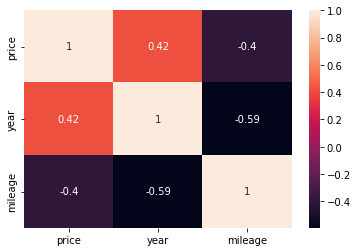

In [19]:
# Correlation Matrix (Meaningful Mostly for Continuous Variables)
corr_matrix = usa_cars_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Average Price by Vehicle Brand

In [20]:
group = usa_cars_data.groupby("brand")["price"].mean()
group

brand
acura               7266.666667
audi               13981.250000
bmw                26397.058824
buick              19715.769231
cadillac           24941.000000
chevrolet          18621.540541
chrysler           13686.111111
dodge              17611.077465
ford               21666.888259
gmc                10657.380952
harley-davidson    54680.000000
heartland           2966.000000
honda               6127.500000
hyundai             5203.200000
infiniti           13098.333333
jaguar              2800.000000
jeep               10933.833333
kia                11123.846154
land               28900.000000
lexus              33220.000000
lincoln            18150.000000
maserati           30300.000000
mazda               8000.000000
mercedes-benz      28704.000000
nissan             12065.820513
peterbilt            400.000000
ram                11050.000000
toyota              6300.000000
Name: price, dtype: float64

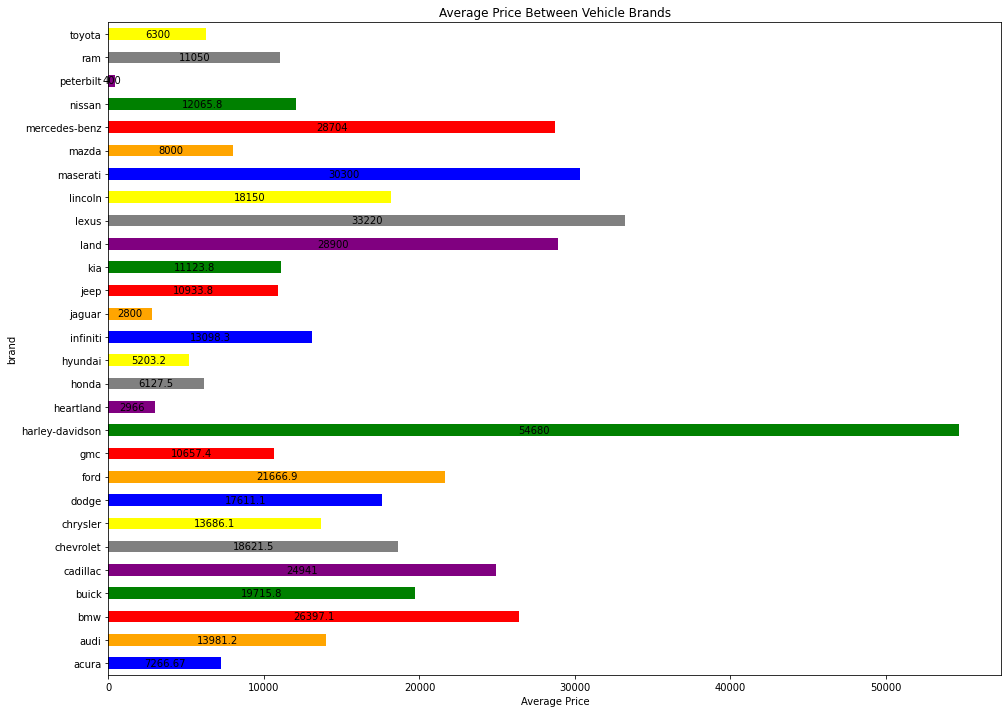

In [22]:
plt.figure(figsize=(16,12))
ax = group.plot(kind='barh', color=['blue','orange', 'red', 'green', 'purple', 'gray', 'yellow'], stacked=False, rot=0)
plt.title("Average Price Between Vehicle Brands")
plt.xlabel("Average Price")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Price by Title Status

In [21]:
group = usa_cars_data.groupby("title_status")["price"].mean()
group

title_status
clean vehicle        19883.053242
salvage insurance     2333.006135
Name: price, dtype: float64

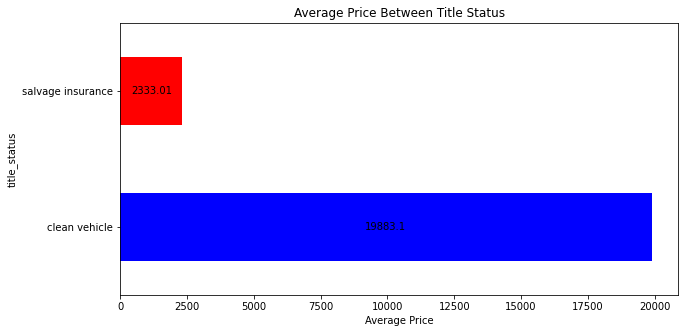

In [24]:
plt.figure(figsize=(10,5))
ax = group.plot(kind='barh', color=['blue', 'red'], stacked=False, rot=0)
plt.title("Average Price Between Title Status")
plt.xlabel("Average Price")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Price by Car Color

In [22]:
group = usa_cars_data.groupby("color")["price"].mean()
group

color
beige                                      13764.000000
billet silver metallic clearcoat           18490.666667
black                                      20289.534884
black clearcoat                            19652.500000
blue                                       17416.887417
bright white clearcoat                     23247.000000
brown                                      16477.200000
burgundy                                    2000.000000
cayenne red                                 9794.000000
charcoal                                   16822.222222
color:                                     11844.600000
competition orange                         30977.000000
dark blue                                     25.000000
glacier white                              11621.000000
gold                                       14400.000000
gray                                       17394.478481
green                                      13827.500000
guard                                     

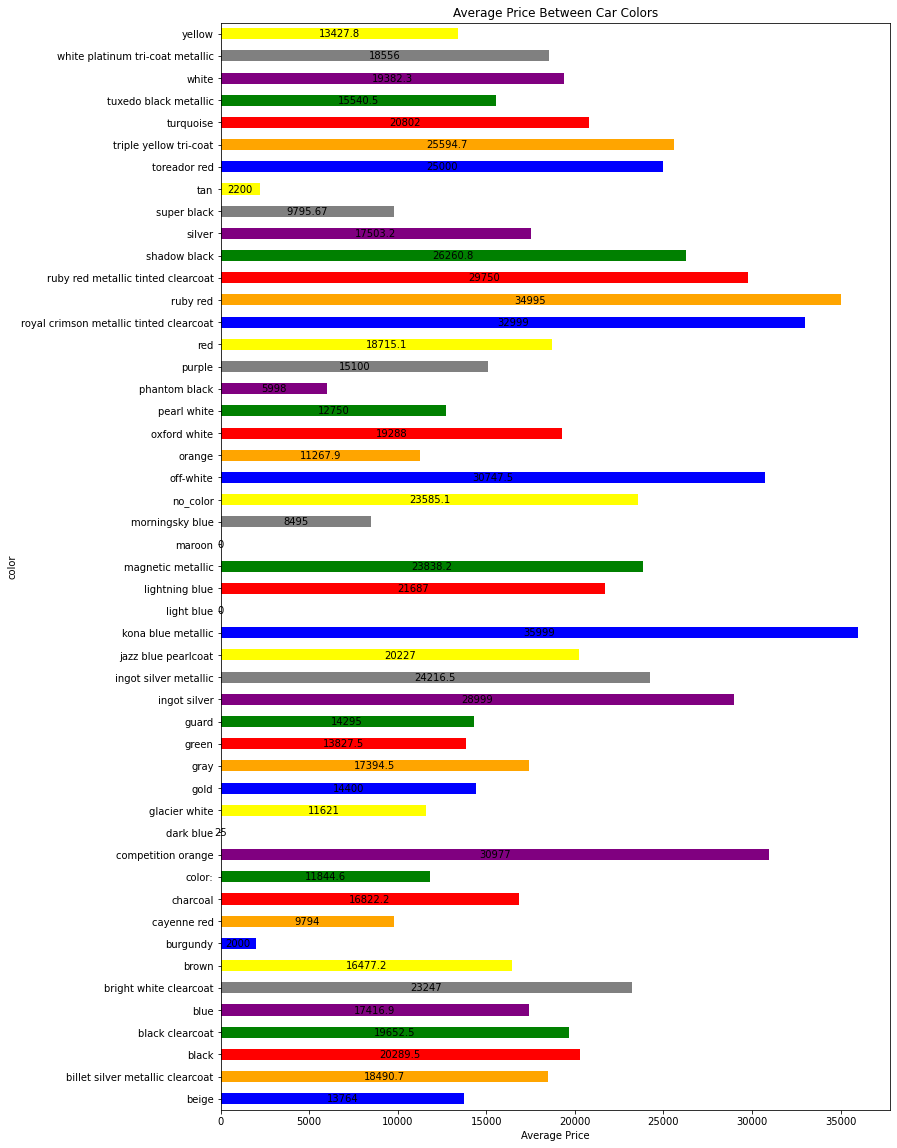

In [26]:
plt.figure(figsize=(12,20))
ax = group.plot(kind='barh', color=['blue','orange', 'red', 'green', 'purple', 'gray', 'yellow'], stacked=False, rot=0)
plt.title("Average Price Between Car Colors")
plt.xlabel("Average Price")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Price By US State

In [23]:
group = usa_cars_data.groupby("state")["price"].mean()
group

state
alabama           23872.058824
arizona           14709.090909
arkansas           3771.666667
california        17836.710526
colorado          12676.190476
connecticut       14713.600000
florida           15075.630081
georgia           16050.313725
idaho             11500.000000
illinois          26715.707965
indiana           21391.428571
kansas            15500.000000
kentucky          44969.444444
louisiana         16181.181818
maryland            662.500000
massachusetts     17650.555556
michigan          23899.822485
minnesota         18207.352941
mississippi       21148.333333
missouri          16192.391304
montana            2825.000000
nebraska          21350.000000
nevada            23653.529412
new hampshire     16757.500000
new jersey        16209.712644
new mexico        27375.000000
new york          17850.706897
north carolina    16485.273973
ohio              17460.967742
oklahoma          19839.084507
oregon            13109.259259
pennsylvania      22810.210702
rh

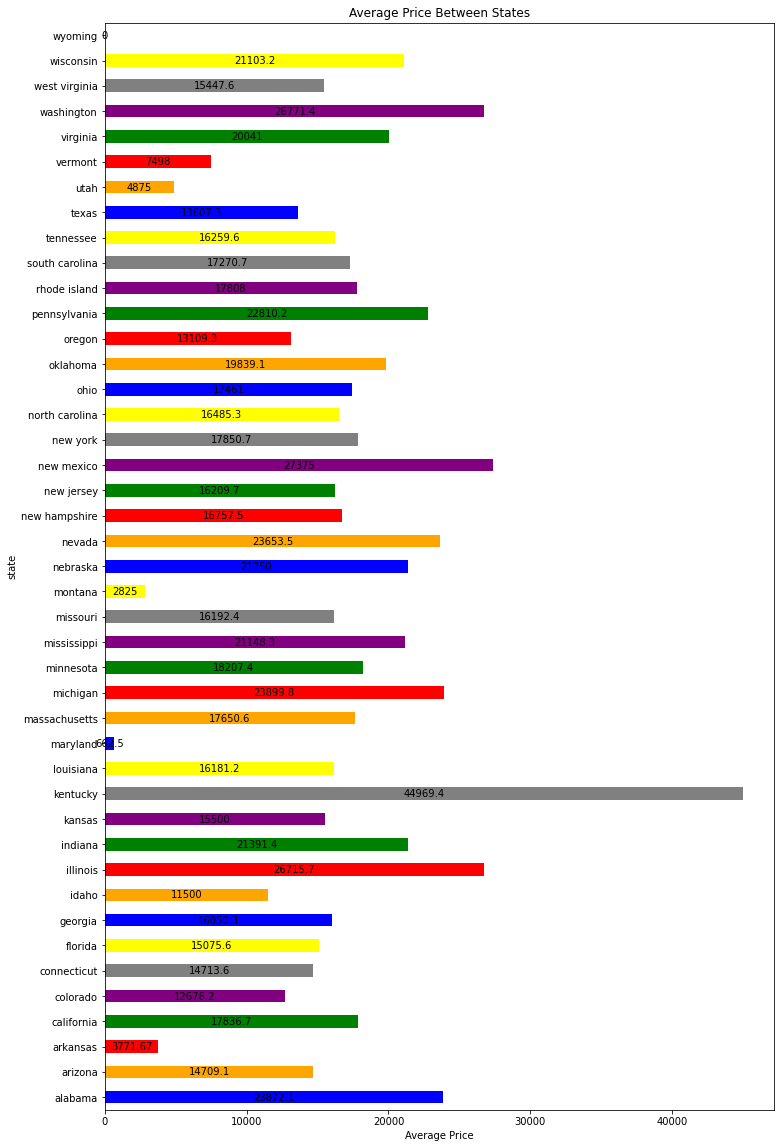

In [28]:
plt.figure(figsize=(12,20))
ax = group.plot(kind='barh', color=['blue','orange', 'red', 'green', 'purple', 'gray', 'yellow'], stacked=False, rot=0)
plt.title("Average Price Between States")
plt.xlabel("Average Price")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Price By Vehicle Registration Year

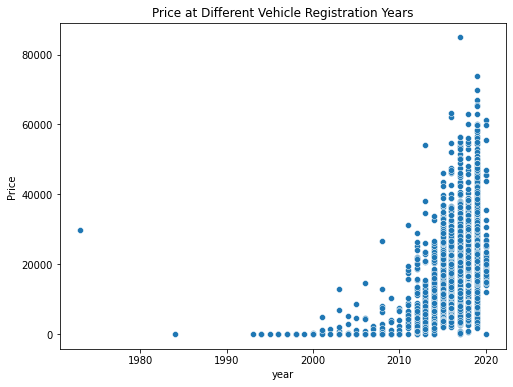

In [24]:
fig_dims = (8, 6)
fig, ax = fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'year', y = 'price', ax = ax, 
            data = usa_cars_data)
plt.ylabel('Price')
plt.title("Price at Different Vehicle Registration Years") 
plt.show()

Price By Mileage

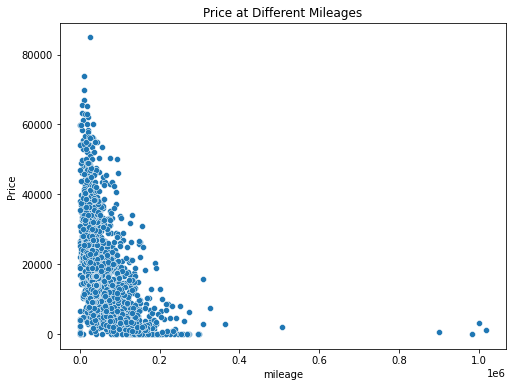

In [25]:
fig_dims = (8, 6)
fig, ax = fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'mileage', y = 'price', ax = ax, 
            data = usa_cars_data)
plt.ylabel('Price')
plt.title("Price at Different Mileages") 
plt.show()

Price Predictions of USA Cars/Vehicles 

In [26]:
# Check first 5 rows of USA Cars dataframe
usa_cars_data.head()

,price,brand,model,year,title_status,mileage,color,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours left


In [27]:
# Checking to see outliers in dataframe
cols = ['price', 'mileage', 'year'] # one or more columns
Q1 = usa_cars_data[cols].quantile(0.25)
Q3 = usa_cars_data[cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((usa_cars_data < (Q1 - 1.5 * IQR)) | (usa_cars_data > (Q3 + 1.5 * IQR))).any(axis=1)
outliers.value_counts()

False    2197
True      295
dtype: int64

In [31]:
# Removing Outliers in usa cars dataframe
usa_cars_data = usa_cars_data[~((usa_cars_data < (Q1 - 1.5 * IQR)) |(usa_cars_data > (Q3 + 1.5 * IQR))).any(axis=1)]
usa_cars_data.shape

(2197, 9)

In [32]:
# Features and target variable
X = usa_cars_data.drop(["price"], axis=1)
y = usa_cars_data["price"]

In [33]:
# Inspection of first 5 rows of features (X) dataframe
X.head()

,brand,model,year,title_status,mileage,color,state,condition
2,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days left
3,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours left
4,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours left
5,dodge,mpv,2018,clean vehicle,45561.0,white,texas,2 days left
7,gmc,door,2017,clean vehicle,23525.0,gray,california,20 hours left


In [34]:
# Features dataframe (X) columns
X.columns

Index(['brand', 'model', 'year', 'title_status', 'mileage', 'color', 'state',
       'condition'],
      dtype='object')

In [73]:
#@title
# # Label encoding values of categorical features
# label_encoder = LabelEncoder()

# # Create a copy of feature (X) dataframe to not modify original features (X) dataframe
# X_copy = X.copy()

# # Encode labels for all categorical features
# X_copy['brand']= label_encoder.fit_transform(X_copy['brand'])
# X_copy['model']= label_encoder.fit_transform(X_copy['model'])
# X_copy['title_status']= label_encoder.fit_transform(X_copy['title_status'])
# X_copy['color']= label_encoder.fit_transform(X_copy['color'])
# X_copy['state']= label_encoder.fit_transform(X_copy['state'])
# X_copy['condition']= label_encoder.fit_transform(X_copy['condition'])

In [ ]:
#@title
# # Inspection of first 5 rows of features (X) dataframe AFTER label encoding
# X_copy.head()

In [35]:
# Select K Best Features Using Univariate Selection (Linear Regression F-Test Only For Regression Features with Regression Target)
best_features = SelectKBest(score_func = f_regression, k = 2)
X_copy_reg = X[['year', 'mileage']] # regression features only 
fit_best_features = best_features.fit(X_copy_reg, y)

# Get p_values for each regression feature in relation to regression target (Price) in one dataframe
p_values_df_regression = pd.DataFrame(fit_best_features.pvalues_)
features_df_regression = pd.DataFrame(X_copy_reg.columns)
feature_p_values_regression = pd.concat([features_df_regression, p_values_df_regression], axis = 1)
feature_p_values_regression.columns = ['Feature', 'P_value']
feature_p_values_regression.nlargest(2, 'P_value')

,Feature,P_value
0,year,7.231496e-61
1,mileage,4.740148e-85


In [36]:
# Using ANOVA F-Test For Categorical Features with Regression Target
import statsmodels.api as sm
from statsmodels.formula.api import ols

categorical_feats = ['brand', 'model', 'title_status', 'color', 'state', 'condition'] # ONLY Categorical Features

feature_p_values_categorical = pd.DataFrame(columns = ['Feature', 'P_value'])

for categorical_feat in categorical_feats:
  model = ols('price ~ ' + categorical_feat, data = usa_cars_data).fit()                
  anova_result = sm.stats.anova_lm(model)
  dataf = pd.DataFrame([[anova_result.index[0], anova_result['PR(>F)'][0]]], columns = ['Feature', 'P_value'])
  feature_p_values_categorical = pd.concat([feature_p_values_categorical, dataf])

feature_p_values_categorical.nsmallest(6, 'P_value')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Feature,P_value
0,model,2.257987e-306
0,brand,1.217157e-59
0,condition,2.632689e-50
0,state,7.754078e-45
0,title_status,1.580090e-28
0,color,3.812238e-02


In [37]:
# Concat scores for Regression and Categorical Features Together and Sort them by P_Value
feature_p_values = pd.concat([feature_p_values_regression, feature_p_values_categorical], axis = 0)
feature_p_values.nsmallest(8, 'P_value')

,Feature,P_value
0,model,2.257987e-306
1,mileage,4.740148e-85
0,year,7.231496e-61
0,brand,1.217157e-59
0,condition,2.632689e-50
0,state,7.754078e-45
0,title_status,1.580090e-28
0,color,3.812238e-02


In [38]:
# Let's choose top 8 features here for Machine Learning modelling BASED on scores instead of feature importance
# chosen_features = list(feature_scores.nlargest(8, 'Score')['Feature'].iloc[0:8])
# X = X[chosen_features]

# Or let's choose features that are relatively high feature importance and/or p_values (Judgement Call!)
chosen_features = ['year', 'mileage', 'model', 'brand']
X = X[chosen_features]

In [39]:
# Dummy encoding for Categorical Variables in Features Dataframe (X)
X = pd.get_dummies(data = X)

In [40]:
# Features Dataframe (X) After Dummy Encoding
X.head()

,year,mileage,model_1500,model_2500,model_2500hd,model_300,model_3500,model_5,model_acadia,model_altima,model_armada,model_bus,model_cab,model_camaro,model_caravan,model_cargo,model_challenger,model_charger,model_cherokee,model_colorado,model_compass,model_connect,model_corvette,model_cruze,model_cutaway,model_cx-3,model_d,model_dart,model_discovery,model_door,model_doors,model_dr,model_drw,model_durango,model_e-class,model_ecosport,model_edge,model_el,model_elantra,model_enclave,...,model_transit,model_traverse,model_trax,model_truck,model_van,model_vans,model_vehicl,model_versa,model_volt,model_wagon,model_x3,model_xd,model_xt5,model_xterra,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,brand_ford,brand_gmc,brand_heartland,brand_honda,brand_hyundai,brand_infiniti,brand_jaguar,brand_jeep,brand_kia,brand_land,brand_lexus,brand_lincoln,brand_maserati,brand_mazda,brand_mercedes-benz,brand_nissan,brand_peterbilt,brand_ram
2,2018,39590.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014,64146.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018,6654.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2018,45561.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2017,23525.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# Inspection of first 5 rows of target (y) dataframe
pd.DataFrame(y).head()

,price
2,5350
3,25000
4,27700
5,5700
7,13350


In [42]:
# Splitting DataFrame into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Scaling Training and Testing Dataset (X_train and X_test) to Standardize/Normalize
from sklearn.preprocessing import StandardScaler

def scaling(X_train, X_test):
  scaler = StandardScaler()

  X_train_scale = scaler.fit_transform(X_train)
  X_test_scale = scaler.transform(X_test)

  X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
  X_test_scale = pd.DataFrame(X_test_scale, columns = X_test.columns)

  return X_train_scale, X_test_scale

In [44]:
# Scaling Training Dataset (X_train and X_test) to Standardize/Normalize
X_train, X_test = scaling(X_train, X_test)

In [45]:
# Inspection of first 5 rows of X_train dataframe
X_train.head()

,year,mileage,model_1500,model_2500,model_2500hd,model_300,model_3500,model_5,model_acadia,model_altima,model_armada,model_bus,model_cab,model_camaro,model_caravan,model_cargo,model_challenger,model_charger,model_cherokee,model_colorado,model_compass,model_connect,model_corvette,model_cruze,model_cutaway,model_cx-3,model_d,model_dart,model_discovery,model_door,model_doors,model_dr,model_drw,model_durango,model_e-class,model_ecosport,model_edge,model_el,model_elantra,model_enclave,...,model_transit,model_traverse,model_trax,model_truck,model_van,model_vans,model_vehicl,model_versa,model_volt,model_wagon,model_x3,model_xd,model_xt5,model_xterra,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,brand_ford,brand_gmc,brand_heartland,brand_honda,brand_hyundai,brand_infiniti,brand_jaguar,brand_jeep,brand_kia,brand_land,brand_lexus,brand_lincoln,brand_maserati,brand_mazda,brand_mercedes-benz,brand_nissan,brand_peterbilt,brand_ram
0,0.846698,-0.857190,-0.120505,-0.057129,0.0,-0.044223,-0.025516,-0.025516,-0.025516,-0.105755,-0.025516,-0.036096,-0.025516,-0.036096,-0.224902,-0.025516,-0.143472,-0.128586,-0.036096,-0.080925,-0.051081,-0.025516,-0.036096,-0.036096,-0.057129,0.0,-0.036096,-0.025516,-0.025516,-0.539997,-0.266609,-0.025516,-0.051081,-0.163463,-0.025516,-0.057129,-0.117696,-0.044223,-0.025516,-0.036096,...,-0.143472,-0.036096,-0.057129,0.0,-0.123254,-0.025516,-0.025516,-0.138675,-0.025516,-0.105755,-0.036096,-0.025516,-0.025516,-0.025516,-0.025516,-0.036096,-0.072334,-0.080925,-0.06764,-0.346789,-0.072334,-0.478139,1.02437,-0.120505,-0.036096,-0.057129,-0.080925,-0.062602,-0.025516,-0.108857,-0.080925,-0.044223,0.0,-0.025516,0.0,0.0,-0.062602,-0.403277,0.0,-0.025516
1,0.295034,-0.055593,-0.120505,-0.057129,0.0,-0.044223,-0.025516,-0.025516,-0.025516,-0.105755,-0.025516,-0.036096,-0.025516,-0.036096,-0.224902,-0.025516,-0.143472,-0.128586,-0.036096,-0.080925,-0.051081,-0.025516,-0.036096,-0.036096,-0.057129,0.0,-0.036096,-0.025516,-0.025516,-0.539997,-0.266609,-0.025516,-0.051081,-0.163463,-0.025516,-0.057129,-0.117696,-0.044223,-0.025516,-0.036096,...,-0.143472,-0.036096,-0.057129,0.0,-0.123254,-0.025516,-0.025516,-0.138675,-0.025516,-0.105755,-0.036096,-0.025516,-0.025516,-0.025516,-0.025516,-0.036096,-0.072334,-0.080925,-0.06764,-0.346789,-0.072334,2.091441,-0.97621,-0.120505,-0.036096,-0.057129,-0.080925,-0.062602,-0.025516,-0.108857,-0.080925,-0.044223,0.0,-0.025516,0.0,0.0,-0.062602,-0.403277,0.0,-0.025516
2,0.846698,-0.354500,-0.120505,-0.057129,0.0,-0.044223,-0.025516,-0.025516,-0.025516,-0.105755,-0.025516,-0.036096,-0.025516,-0.036096,-0.224902,-0.025516,-0.143472,-0.128586,-0.036096,-0.080925,-0.051081,-0.025516,-0.036096,-0.036096,-0.057129,0.0,-0.036096,-0.025516,-0.025516,-0.539997,-0.266609,-0.025516,-0.051081,-0.163463,-0.025516,-0.057129,-0.117696,-0.044223,-0.025516,-0.036096,...,-0.143472,-0.036096,-0.057129,0.0,-0.123254,-0.025516,-0.025516,-0.138675,-0.025516,-0.105755,-0.036096,-0.025516,-0.025516,-0.025516,-0.025516,-0.036096,-0.072334,-0.080925,-0.06764,-0.346789,-0.072334,2.091441,-0.97621,-0.120505,-0.036096,-0.057129,-0.080925,-0.062602,-0.025516,-0.108857,-0.080925,-0.044223,0.0,-0.025516,0.0,0.0,-0.062602,-0.403277,0.0,-0.025516
3,0.295034,-1.221228,8.298412,-0.057129,0.0,-0.044223,-0.025516,-0.025516,-0.025516,-0.105755,-0.025516,-0.036096,-0.025516,-0.036096,-0.224902,-0.025516,-0.143472,-0.128586,-0.036096,-0.080925,-0.051081,-0.025516,-0.036096,-0.036096,-0.057129,0.0,-0.036096,-0.025516,-0.025516,-0.539997,-0.266609,-0.025516,-0.051081,-0.163463,-0.025516,-0.057129,-0.117696,-0.044223,-0.025516,-0.036096,...,-0.143472,-0.036096,-0.057129,0.0,-0.123254,-0.025516,-0.025516,-0.138675,-0.025516,-0.105755,-0.036096,-0.025516,-0.025516,-0.025516,-0.025516,-0.036096,-0.072334,-0.080925,-0.06764,2.883600,-0.072334,-0.478139,-0.97621,-0.120505,-0.036096,-0.057129,-0.080925,-0.062602,-0.025516,-0.108857,-0.080925,-0.044223,0.0,-0.025516,0.0,0.0,-0.062

In [46]:
# Inspection of first 5 rows of y_train dataframe
pd.DataFrame(y_train).head()

,price
1367,24000
157,4290
1186,16600
4,27700
735,34800


In [47]:
# Inspection of first 5 rows of X_test dataframe
X_test.head()

,year,mileage,model_1500,model_2500,model_2500hd,model_300,model_3500,model_5,model_acadia,model_altima,model_armada,model_bus,model_cab,model_camaro,model_caravan,model_cargo,model_challenger,model_charger,model_cherokee,model_colorado,model_compass,model_connect,model_corvette,model_cruze,model_cutaway,model_cx-3,model_d,model_dart,model_discovery,model_door,model_doors,model_dr,model_drw,model_durango,model_e-class,model_ecosport,model_edge,model_el,model_elantra,model_enclave,...,model_transit,model_traverse,model_trax,model_truck,model_van,model_vans,model_vehicl,model_versa,model_volt,model_wagon,model_x3,model_xd,model_xt5,model_xterra,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,brand_ford,brand_gmc,brand_heartland,brand_honda,brand_hyundai,brand_infiniti,brand_jaguar,brand_jeep,brand_kia,brand_land,brand_lexus,brand_lincoln,brand_maserati,brand_mazda,brand_mercedes-benz,brand_nissan,brand_peterbilt,brand_ram
0,-2.463285,2.859018,-0.120505,-0.057129,0.0,-0.044223,-0.025516,-0.025516,-0.025516,-0.105755,-0.025516,-0.036096,-0.025516,-0.036096,-0.224902,-0.025516,-0.143472,-0.128586,-0.036096,-0.080925,-0.051081,-0.025516,-0.036096,-0.036096,-0.057129,0.0,-0.036096,-0.025516,-0.025516,1.851863,-0.266609,-0.025516,-0.051081,-0.163463,-0.025516,-0.057129,-0.117696,-0.044223,-0.025516,-0.036096,...,-0.143472,-0.036096,-0.057129,0.0,-0.123254,-0.025516,-0.025516,-0.138675,-0.025516,-0.105755,-0.036096,-0.025516,-0.025516,-0.025516,-0.025516,-0.036096,-0.072334,-0.080925,-0.06764,2.883600,-0.072334,-0.478139,-0.97621,-0.120505,-0.036096,-0.057129,-0.080925,-0.062602,-0.025516,-0.108857,-0.080925,-0.044223,0.0,-0.025516,0.0,0.0,-0.062602,-0.403277,0.0,-0.025516
1,0.295034,-0.192553,-0.120505,-0.057129,0.0,-0.044223,-0.025516,-0.025516,-0.025516,-0.105755,-0.025516,-0.036096,-0.025516,-0.036096,-0.224902,-0.025516,-0.143472,-0.128586,-0.036096,-0.080925,-0.051081,-0.025516,-0.036096,-0.036096,-0.057129,0.0,-0.036096,-0.025516,-0.025516,-0.539997,-0.266609,-0.025516,-0.051081,-0.163463,-0.025516,-0.057129,-0.117696,-0.044223,-0.025516,-0.036096,...,-0.143472,-0.036096,-0.057129,0.0,-0.123254,-0.025516,-0.025516,-0.138675,-0.025516,-0.105755,-0.036096,-0.025516,-0.025516,-0.025516,-0.025516,-0.036096,-0.072334,-0.080925,-0.06764,-0.346789,-0.072334,-0.478139,1.02437,-0.120505,-0.036096,-0.057129,-0.080925,-0.062602,-0.025516,-0.108857,-0.080925,-0.044223,0.0,-0.025516,0.0,0.0,-0.062602,-0.403277,0.0,-0.025516
2,-0.256630,-0.143191,-0.120505,-0.057129,0.0,-0.044223,-0.025516,-0.025516,-0.025516,-0.105755,-0.025516,-0.036096,-0.025516,-0.036096,-0.224902,-0.025516,-0.143472,-0.128586,-0.036096,-0.080925,-0.051081,-0.025516,-0.036096,-0.036096,-0.057129,0.0,-0.036096,-0.025516,-0.025516,-0.539997,-0.266609,-0.025516,-0.051081,-0.163463,-0.025516,-0.057129,-0.117696,-0.044223,-0.025516,-0.036096,...,-0.143472,-0.036096,-0.057129,0.0,-0.123254,-0.025516,-0.025516,-0.138675,-0.025516,-0.105755,-0.036096,-0.025516,-0.025516,-0.025516,-0.025516,-0.036096,-0.072334,-0.080925,-0.06764,-0.346789,-0.072334,-0.478139,-0.97621,-0.120505,-0.036096,-0.057129,-0.080925,-0.062602,-0.025516,-0.108857,-0.080925,-0.044223,1.0,-0.025516,0.0,0.0,-0.062602,-0.403277,0.0,-0.025516
3,-1.359957,0.998970,-0.120505,-0.057129,0.0,-0.044223,-0.025516,-0.025516,-0.025516,-0.105755,-0.025516,-0.036096,-0.025516,-0.036096,-0.224902,-0.025516,-0.143472,-0.128586,-0.036096,-0.080925,-0.051081,-0.025516,-0.036096,-0.036096,17.504285,0.0,-0.036096,-0.025516,-0.025516,-0.539997,-0.266609,-0.025516,-0.051081,-0.163463,-0.025516,-0.057129,-0.117696,-0.044223,-0.025516,-0.036096,...,-0.143472,-0.036096,-0.057129,0.0,-0.123254,-0.025516,-0.025516,-0.138675,-0.025516,-0.105755,-0.036096,-0.025516,-0.025516,-0.025516,-0.025516,-0.036096,-0.072334,-0.080925,-0.06764,-0.346789,-0.072334,-0.478139,1.02437,-0.120505,-0.036096,-0.057129,-0.080925,-0.062602,-0.025516,-0.108857,-0.080925,-0.044223,0.0,-0.025516,0.0,0.0,-0.0

In [48]:
# Inspection of first 5 rows of y_test dataframe
pd.DataFrame(y_test).head()

,price
581,4500
2113,38800
503,10840
1321,16800
476,30300


In [53]:
# Modelling on Revised Training and Testing Dataset  (X_train_scale and y_train_scale)
# Predicting on test set (X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report

# Modelling on Revised Training Dataset  (X_train and y_train)
# Predicting on test set (X_test)

def predictions(model_name, X_train, X_test, y_train):
  model = model_name
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  return y_pred


def model_accuracy(model_name, X_train, X_test, y_train, y_test):
  y_pred = predictions(model_name, X_train, X_test, y_train)
    
  # calculating mean squared error
  mse = mean_squared_error(y_test, y_pred)

  # calculating root mean squared error
  rmse = mean_squared_error(y_test, y_pred, squared = False)

  # calculating mean absolute error
  mae = mean_absolute_error(y_test, y_pred)
    
  return mse, rmse, mae

In [117]:
#@title
# # Using Recursive Feature Elimination (RFE) to Perform Feature Selection
# from sklearn.feature_selection import RFE

# def recursive_feature_elimination(estimator, num_feats, X_train, X_test, y_train, y_test):
#   rfes = []
#   scores = []

#   for n in range(1,len(X_train.columns)):
#       rfe = RFE(estimator = estimator, n_features_to_select = n).fit(X_train, y_train)
#       rfes.append(rfe)
#       yHat = rfe.predict(X_test)
#       scores.append(mean_squared_error(y_test, yHat))
        
#   best_rfe = rfes[scores.find(max(scores))]
#   results = best_rfe.support_ # to get features that are used in best results of rfe
#   new_X = [] # X with selected features
#   for feat, result in list(zip(X, results)):
#       if result == True:
#         new_X.append(feat)

#   return X_train[new_X], X_test[new_X]

In [ ]:
#@title
# # Using Lasso Regression 
# from sklearn import linear_model
# lassoReg = linear_model.Lasso(alpha=0.01)
# mse, rmse, mae = model_accuracy(lassoReg, X_train, X_test, y_train, y_test) 
# print("Mean Squared Error is: ", mse)
# print("                            ")
# print("Root Mean Squared Error is: ", rmse)
# print("                            ")
# print("Mean Absolute Error is: ", mae)
# print("                            ")

# coef = pd.Series(lassoReg.coef_, index = X_train.columns)
# imp_coef = coef.sort_values()
# plt.rcParams['figure.figsize'] = (50.0, 50.0)
# imp_coef.plot(kind = "barh")
# plt.title("Feature importance using Lasso Model")

# print("Lasso picked " + str(sum(coef != 0)) + " variables")
# print("Lasso eliminated " +  str(sum(coef == 0)) + " variables")

In [98]:
#@title
# Features and Dummy Variables Chosen by Lasso Regression
# feats_lasso = list(pd.DataFrame(coef[coef != 0]).index)
# X_train, X_test = X_train[feats_lasso], X_test[feats_lasso]

In [54]:
# Using Multiple Linear Regression
linear_model = LinearRegression()
mse, rmse, mae = model_accuracy(linear_model, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

Mean Squared Error is:  1.2834649594843377e+32
                            
Root Mean Squared Error is:  1.1329011252021678e+16
                            
Mean Absolute Error is:  1125270941137111.1
                            


n_estimators value with minimum mean absolute error:  (63, 4271.222454705788)


Text(0, 0.5, 'Mean Absolute Error')

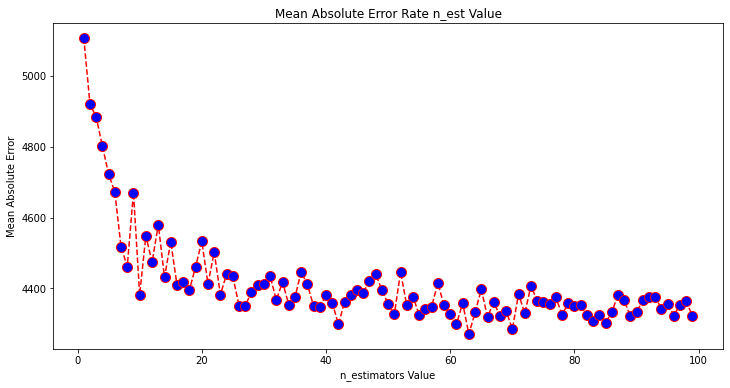

In [52]:
# Best number of trees value for Random Forest Regressor Based on error rate
error = []
n_est_with_error = []

# Picking optimal  k value after calculating error for k values between 1 and 40
for i in range(1, 100):
    rf=RandomForestRegressor(n_estimators=i)
    rf.fit(X_train, y_train)
    pred_i = rf.predict(X_test)
    error.append(mean_absolute_error(y_test, pred_i))
    n_est_with_error.append((i, mean_absolute_error(y_test, pred_i)))

print("n_estimators value with minimum mean absolute error: ", min(n_est_with_error, key=lambda x: x[1]))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Mean Absolute Error Rate n_est Value')
plt.xlabel('n_estimators Value')
plt.ylabel('Mean Absolute Error')

In [57]:
# Using RandomForest Regressor
RFR_model = RandomForestRegressor(max_depth=min(n_est_with_error, key=lambda x: x[1])[0])
mse, rmse, mae = model_accuracy(RFR_model, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

Mean Squared Error is:  42585969.49973149
                            
Root Mean Squared Error is:  6525.792633828591
                            
Mean Absolute Error is:  4332.761934343434
                            


n_estimators value with minimum mean absolute error:  (19, 4818.346717547067)


Text(0, 0.5, 'Mean Absolute Error')

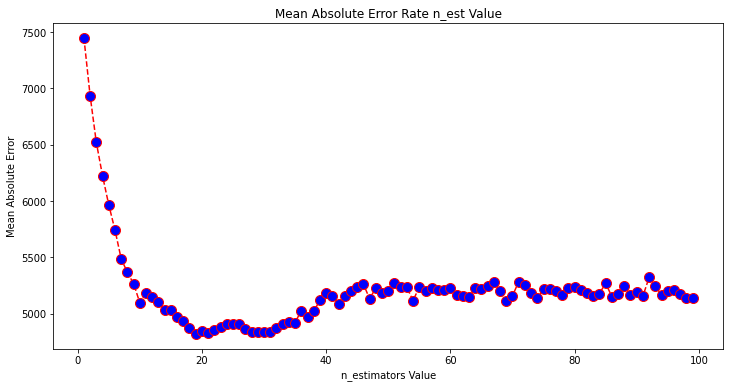

In [58]:
# Best number of branches value for Decision Tree Regressor Based on error rate
error = []
n_est_with_error = []

# Picking optimal  k value after calculating error for k values between 1 and 40
for i in range(1, 100):
    dt=DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    pred_i = dt.predict(X_test)
    error.append(mean_absolute_error(y_test, pred_i))
    n_est_with_error.append((i, mean_absolute_error(y_test, pred_i)))

print("n_estimators value with minimum mean absolute error: ", min(n_est_with_error, key=lambda x: x[1]))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Mean Absolute Error Rate n_est Value')
plt.xlabel('n_estimators Value')
plt.ylabel('Mean Absolute Error')

In [59]:
# Using Decision Tree Regressor 
DTR_model = DecisionTreeRegressor(max_depth=min(n_est_with_error, key=lambda x: x[1])[0])
mse, rmse, mae = model_accuracy(DTR_model, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

Mean Squared Error is:  56607376.577020794
                            
Root Mean Squared Error is:  7523.787382496982
                            
Mean Absolute Error is:  4857.272475122824
                            


In [60]:
# Using Support Vector Regressor (SVR)
SVR_model = SVR()
mse, rmse, mae = model_accuracy(SVR_model, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

Mean Squared Error is:  102246703.61201406
                            
Root Mean Squared Error is:  10111.711210869013
                            
Mean Absolute Error is:  8011.297666878082
                            


In [61]:
# Using XGBoost Regressor 
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
mse, rmse, mae = model_accuracy(xgb_model, X_train, X_test, y_train, y_test) 
print("Mean Squared Error is: ", mse)
print("                            ")
print("Root Mean Squared Error is: ", rmse)
print("                            ")
print("Mean Absolute Error is: ", mae)
print("                            ")

Mean Squared Error is:  42676613.69243326
                            
Root Mean Squared Error is:  6532.734013598997
                            
Mean Absolute Error is:  4819.659656131629
                            


Finding Combination of Features with Lowest Mean Absolute Error Using Each Machine Learning Model

In [62]:
# Finding combination of original features giving lowest MAE 

# Subsets of Features Combinations
import itertools

X = usa_cars_data.drop(["price"], axis=1)
y = usa_cars_data["price"]

feats = list(X.columns)
combinations = [list(subset) for i in range(0, len(feats) + 1) for subset in itertools.combinations(feats, i)]
del combinations[0]

def combination_feats_lowest_error(X, y, model):
  global combinations
  curr_min_mae = float('inf')
  comb_feats_and_mae = {}

  for combination in combinations:

    # Or let's choose features that are relatively high feature importance and/or p_values (Judgement Call!)
    chosen_features = combination
    X_copy = X[chosen_features]

    # Dummy encoding for Categorical Variables in Features Dataframe (X)
    X_copy = pd.get_dummies(data = X_copy)

    # Splitting DataFrame into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.3, random_state=42)

    # Scaling Training Dataset (X_train and X_test) to Standardize/Normalize
    X_train, X_test = scaling(X_train, X_test)

    # MSE, RMSE, MAE using Chosen Model
    mse, rmse, mae = model_accuracy(model, X_train, X_test, y_train, y_test)

    # Map MAE with corresponding features used
    comb_feats_and_mae[mae] = chosen_features

    # Choose feature combination with lowest MAE for given model
    if mae < curr_min_mae:
      curr_min_mae = mae

  # Features chosen with lowest MAE
  features_with_min_mae = comb_feats_and_mae.get(curr_min_mae)

  return curr_min_mae, features_with_min_mae

In [63]:
# Using Multiple Linear Regression
linear_model = LinearRegression()
min_mae, features_used = combination_feats_lowest_error(X, y, linear_model)
print("Features used: ", features_used)
print("                            ")
print("Mean Absolute Error is: ", min_mae)
print("                            ")

Features used:  ['brand', 'mileage']
                            
Mean Absolute Error is:  6511.897534151441
                            


In [64]:
# Using RandomForest Regressor
RFR_model = RandomForestRegressor(max_depth=90)
min_mae, features_used = combination_feats_lowest_error(X, y, RFR_model)
print("Features used: ", features_used)
print("                            ")
print("Mean Absolute Error is: ", min_mae)
print("                            ")

Features used:  ['brand', 'model', 'year', 'title_status', 'state']
                            
Mean Absolute Error is:  3579.9816656389703
                            


In [65]:
# Using Decision Tree Regressor 
DTR_model = DecisionTreeRegressor(max_depth=90)
min_mae, features_used = combination_feats_lowest_error(X, y, DTR_model)
print("Features used: ", features_used)
print("                            ")
print("Mean Absolute Error is: ", min_mae)
print("                            ")

Features used:  ['brand', 'model', 'year', 'title_status', 'state']
                            
Mean Absolute Error is:  3814.2629393333937
                            


In [66]:
# Using Support Vector Regressor (SVR)
SVR_model = SVR()
min_mae, features_used = combination_feats_lowest_error(X, y, SVR_model)
print("Features used: ", features_used)
print("                            ")
print("Mean Absolute Error is: ", min_mae)
print("                            ")

Features used:  ['mileage']
                            
Mean Absolute Error is:  7981.464524423396
                            


In [67]:
# Using XGBoost Regressor 
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
min_mae, features_used = combination_feats_lowest_error(X, y, xgb_model)
print("Features used: ", features_used)
print("                            ")
# mse, rmse, mae = model_accuracy(xgb_model, X_train, X_test, y_train, y_test) 
# print("Mean Squared Error is: ", mse)
# print("                            ")
# print("Root Mean Squared Error is: ", rmse)
# print("                            ")
print("Mean Absolute Error is: ", min_mae)
print("                            ")

Features used:  ['brand', 'model', 'year', 'title_status', 'mileage', 'color', 'state', 'condition']
                            
Mean Absolute Error is:  4565.648680530895
                            
